# **Venkata Rachakonda - 100893970**

# Problem Statement

Spam mails are a widespread problem that involves the unsolicited sending of bulk email messages.
These messages are typically commercial in nature and often contain fraudulent or inappropriate content.
The use of spam emails can lead to a range of negative consequences, including cybersecurity risks and financial harm to individuals and organizations.

# Deliverables


- M’ Corp is developing an application that will allow users to send messages and at the same time track security.
- This application will be powered by AI technology.
- The security will be composed of an encryption process and it is mandatory to follow this file-conversion >> “chyper-code.xlsx”
- It was requested that your team (max: 4 team members) develop the application and a ML model (python-based).
- A dataset was provided to support the training process (“file.xls”). The algorithm to be used is a team decision.
- The Data storage is mandatory (database or a file approach). Database(s): SQLite (free), MS SQL Server, ...
- The data generated by the application (user’s entry) will be used to test real scenarios. The records must ne extracted from the DB (“data-entry.csv”)
and feed the model to receive an automatic span or no-span detection.
- Your Jupyter notebook will be used to verify the records (mail messages) classification.
Deliverable #

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saikiran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/AI Algorithms/Technical-Challenge 2/'
path = ''

In [4]:
# read file into pandas using a relative path
mail_df = pd.read_excel(path+"file.xlsx")
mail_df.head()

,ID,EMAIL,email,label
0,1,1email@gmail.com,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,2,2email@gmail.com,martin a posted tassos papadopoulos the greek ...,0
2,3,3email@gmail.com,man threatens explosion in moscow thursday aug...,0
3,4,4email@gmail.com,klez the virus that won t die already the most...,0
4,5,5email@gmail.com,in adding cream to spaghetti carbonara which ...,0


In [5]:
mail_df = mail_df.rename(columns={'email': 'message'})

In [6]:
mail_df = mail_df[['message', 'label']]
mail_df['label_num'] = mail_df['label']
mail_df['label'] = mail_df['label_num'].replace({1: 'spam', 0: 'not spam'})

# Exploratory Data Analysis (EDA)

In [7]:
mail_df[['label', 'message']].describe()

,label,message
count,2968,2967
unique,2,2840
top,not spam,url URL date not supplied URL
freq,2468,10


In [8]:
mail_df.groupby('label').describe()

label_num                                   
             count mean  std  min  25%  50%  75%  max
label                                                
not spam    2468.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam         500.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

We have `2648` not spam message and `500` spam message

In [9]:
# convert label to a numerical variable
mail_df['label_num'] = mail_df.label.map({'not spam':0, 'spam':1})
mail_df.head()

,message,label,label_num
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,not spam,0
1,martin a posted tassos papadopoulos the greek ...,not spam,0
2,man threatens explosion in moscow thursday aug...,not spam,0
3,klez the virus that won t die already the most...,not spam,0
4,in adding cream to spaghetti carbonara which ...,not spam,0


> As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of feature engineering. The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.

In [10]:
print(mail_df['message'].dtype)


object


In [11]:
mail_df['message'] = mail_df['message'].astype(str)

In [12]:
mail_df['message_len'] = mail_df.message.apply(len)
mail_df.head()

,message,label,label_num,message_len
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,not spam,0,1522
1,martin a posted tassos papadopoulos the greek ...,not spam,0,643
2,man threatens explosion in moscow thursday aug...,not spam,0,1509
3,klez the virus that won t die already the most...,not spam,0,1015
4,in adding cream to spaghetti carbonara which ...,not spam,0,771


Text(0.5, 0, 'Message Length')

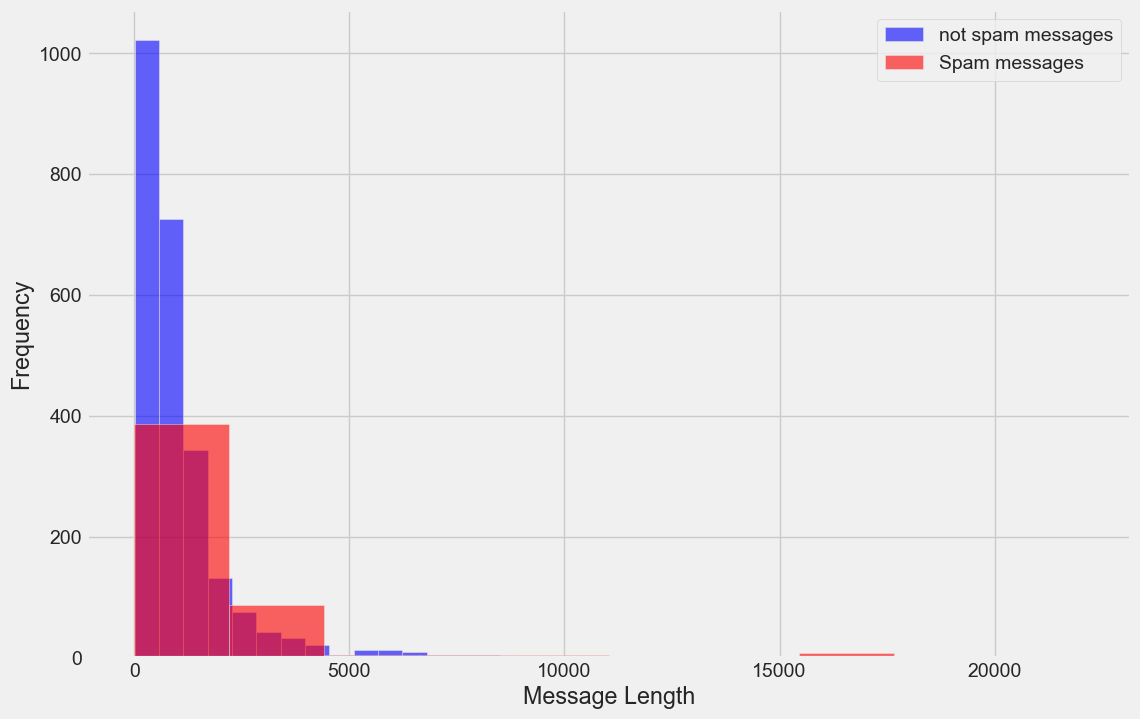

In [13]:
plt.figure(figsize=(12, 8))

mail_df[mail_df.label=='not spam'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='not spam messages', alpha=0.6)
mail_df[mail_df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

a trend that spam messages tend to have more characters.

In [14]:
mail_df[mail_df.label=='not spam'].describe()

,label_num,message_len
count,2468.0,2468.000000
mean,0.0,1127.898298
std,0.0,1618.131386
min,0.0,5.000000
25%,0.0,356.000000
50%,0.0,716.500000
75%,0.0,1269.000000
max,0.0,19820.000000


In [15]:
mail_df[mail_df.label=='spam'].describe()

,label_num,message_len
count,500.0,500.000000
mean,1.0,1801.326000
std,0.0,2858.981401
min,1.0,1.000000
25%,1.0,560.000000
50%,1.0,956.500000
75%,1.0,1941.000000
max,1.0,22067.000000


> Spam has 22067 characters!

In [16]:
mail_df[mail_df.message_len == 22067].message.iloc[0]

'uncommon exotic pleasure botanicals feeling marvelous mood sensitive mood enhancing depressive regressive sweet treat forumulations for the pleasuring and well being of body mind spirit from the planet s foremost sensitive ethnobotanical cooperative exotic botanical resources product descriptions pricing and deep discounted intro offers information below seventh heaven sweet treat menu NUMBER shangrila zowie wowie tm gnarly sweet grass absolutely the most significant legal personal choice non cannabis non marijuana non tobacco smoking botanical on the planet NUMBER prosaka tm high ratio extracts in tablet form for calm balance serenity peaceful living NUMBER aqueous kathmandu tm happy drops personal choice enhanced sensitivity for non smokers tokers NUMBER sweet vjestika tm aphrodisia drops erotica intimacy sensitivity enhancement at its finest for men woman NUMBER gentle ferocity tm viripotent energization appetite suppression tablets without the inclusion of caffeine or mahaung herb

# Building the model

In [17]:
# read file into pandas using a relative path
# path = '/content/drive/MyDrive/AI Algorithms/Technical-Challenge 2/'
path = ''
mail_df = pd.read_excel(path+"file.xlsx")
mail_df.head()

,ID,EMAIL,email,label
0,1,1email@gmail.com,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,2,2email@gmail.com,martin a posted tassos papadopoulos the greek ...,0
2,3,3email@gmail.com,man threatens explosion in moscow thursday aug...,0
3,4,4email@gmail.com,klez the virus that won t die already the most...,0
4,5,5email@gmail.com,in adding cream to spaghetti carbonara which ...,0


In [18]:
mail_df = mail_df.rename(columns={'email': 'message'})

In [19]:
mail_df.message = mail_df.message.astype(str)

In [20]:
mail_df = mail_df[['message', 'label']]
mail_df['label_num'] = mail_df['label']
mail_df['label'] = mail_df['label_num'].replace({1: 'spam', 0: 'not spam'})

In [21]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [22]:
mail_df['clean_msg'] = mail_df.message.apply(text_process)

### Train test Split

In [23]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the mail_df data) for use with COUNTVECTORIZER
X = mail_df.clean_msg
y = mail_df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2968,)
(2968,)
(2226,)
(742,)
(2226,)
(742,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
# instantiate the vectorizer
vect = CountVectorizer()

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

with open(path+'vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (2226, 25327)
<class 'scipy.sparse._csr.csr_matrix'> (742, 25327)


### Logistic Regression

In [25]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 3.74 s, sys: 91.4 ms, total: 3.83 s
Wall time: 3.53 s


LogisticRegression(solver='liblinear')

In [26]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob[0:10]

array([4.44769430e-03, 3.86745681e-03, 7.41040756e-03, 3.88728797e-05,
       9.60437585e-01, 9.89329602e-01, 1.08062653e-03, 2.05594746e-05,
       4.27528723e-02, 6.52931229e-07])

In [27]:
y_pred_class[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [28]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9824797843665768
=======Confision Matrix===========
[[603   1]
 [ 12 126]]
=======ROC AUC Score===========
0.9923217199347345


### MultinomialNB

In [29]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 12.5 ms, sys: 9.7 ms, total: 22.2 ms
Wall time: 5.27 ms


MultinomialNB()

In [31]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [32]:
y_pred_class[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [33]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9824797843665768
=======Confision Matrix===========
[[603   1]
 [ 12 126]]
=======ROC AUC Score===========
0.9923217199347345


# Testing the model

In [34]:
with open(path+'model.pkl', 'wb') as f:
    pickle.dump(nb, f)

# Testing the final model

In [12]:
import psycopg2

def create_connection():
    conn = psycopg2.connect(
        host="assignmentvenkata.postgres.database.azure.com",
        port="5432",
        dbname="db.user",
        user="venkata",
        password="Sai@121993"
    )
    return conn

conn =create_connection()

In [17]:
path = ""
def get_all_mails():
    """
    Fetches all email data from the 'TB_MAIL' table and saves it to a CSV file in the specified path.

    Returns:
    None: If the data retrieval and CSV write operations are successful.

    Raises:
    Exception: If an error occurs while executing the SQL statement or saving the data to the CSV file.
    """
    try:
        # Execute your SQL statement
        conn.commit()
        qry = "SELECT * FROM TB_MAIL"
        df = pd.read_sql_query(qry, conn)
        df.to_csv(path + 'data-entry.csv')
    except Exception as e:
        # Handle all other exceptions here
        conn.rollback()
        print(f"Error: {e}")
        return None


Fetches all email data from the 'TB_MAIL' table and saves it to a CSV file in the specified path.

In [18]:
get_all_mails()

/Users/saikiran/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [19]:
df = pd.read_csv(path + 'data-entry.csv')

In [20]:
df

,Unnamed: 0,mail_id,user_id,login,mail_content,to_login,spam
0,0,1,1,sai@gmail.com,hyperlink click here now simply amateur just ...,check@gmail.com,1
1,1,2,1,sai@gmail.com,suppliers of computers printers etc consumable...,check@gmail.com,1
2,2,3,1,sai@gmail.com,this URL email is sponsored by thinkgeek welc...,check@gmail.com,0
3,3,4,1,sai@gmail.com,ebay NUMBER rated work at home business oppor...,check@gmail.com,1
4,4,5,1,sai@gmail.com,save up to NUMBER on your term life insurance...,check@gmail.com,1
5,5,6,1,sai@gmail.com,hyperlink life can change in an instant that ...,check@gmail.com,1
6,6,7,1,sai@gmail.com,hyperlink life can change in an instant that ...,trial@gmail.com,1
7,7,8,1,sai@gmail.com,can someone explain what type of operating sys...,trial@gmail.com,0
8,8,9,1,sai@gmail.com,has anyone seen heard of used some package tha...,trial@gmail.com,0
9,9,10,1,sai@gmail.com,has anyone seen heard of used some package tha...,check@gmail.com,0
